In [1]:
import pandas as pd# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

In [3]:
# Display basic information about the dataset
print("\n--- Training Data Info ---\n")
train_data.info()


--- Training Data Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes:

In [4]:
print("\n--- Training Data Sample ---\n")
train_data.head()


--- Training Data Sample ---



,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [21]:
# Check for duplicate values
print("\n--- Duplicate Values ---\n")
train_data.duplicated().sum()


--- Duplicate Values ---



0

In [19]:
# Check for missing values
print("\n--- Missing Values ---\n")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])



--- Missing Values ---

Series([], dtype: int64)


In [6]:
# Basic statistics of numerical features
print("\n--- Statistical Summary ---\n")
train_data.describe()


--- Statistical Summary ---



,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
# Count unique values for categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"\n--- Unique Values in {col} ---\n")
    count = train_data[col].nunique()
    print(f"Number of categories: {count}")
    print()
    print(train_data[col].value_counts())


--- Unique Values in person_home_ownership ---

Number of categories: 4

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

--- Unique Values in loan_intent ---

Number of categories: 6

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

--- Unique Values in loan_grade ---

Number of categories: 7

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

--- Unique Values in cb_person_default_on_file ---

Number of categories: 2

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


In [28]:
train_data = train_data.drop('id', axis = 1)

## Numerical columns

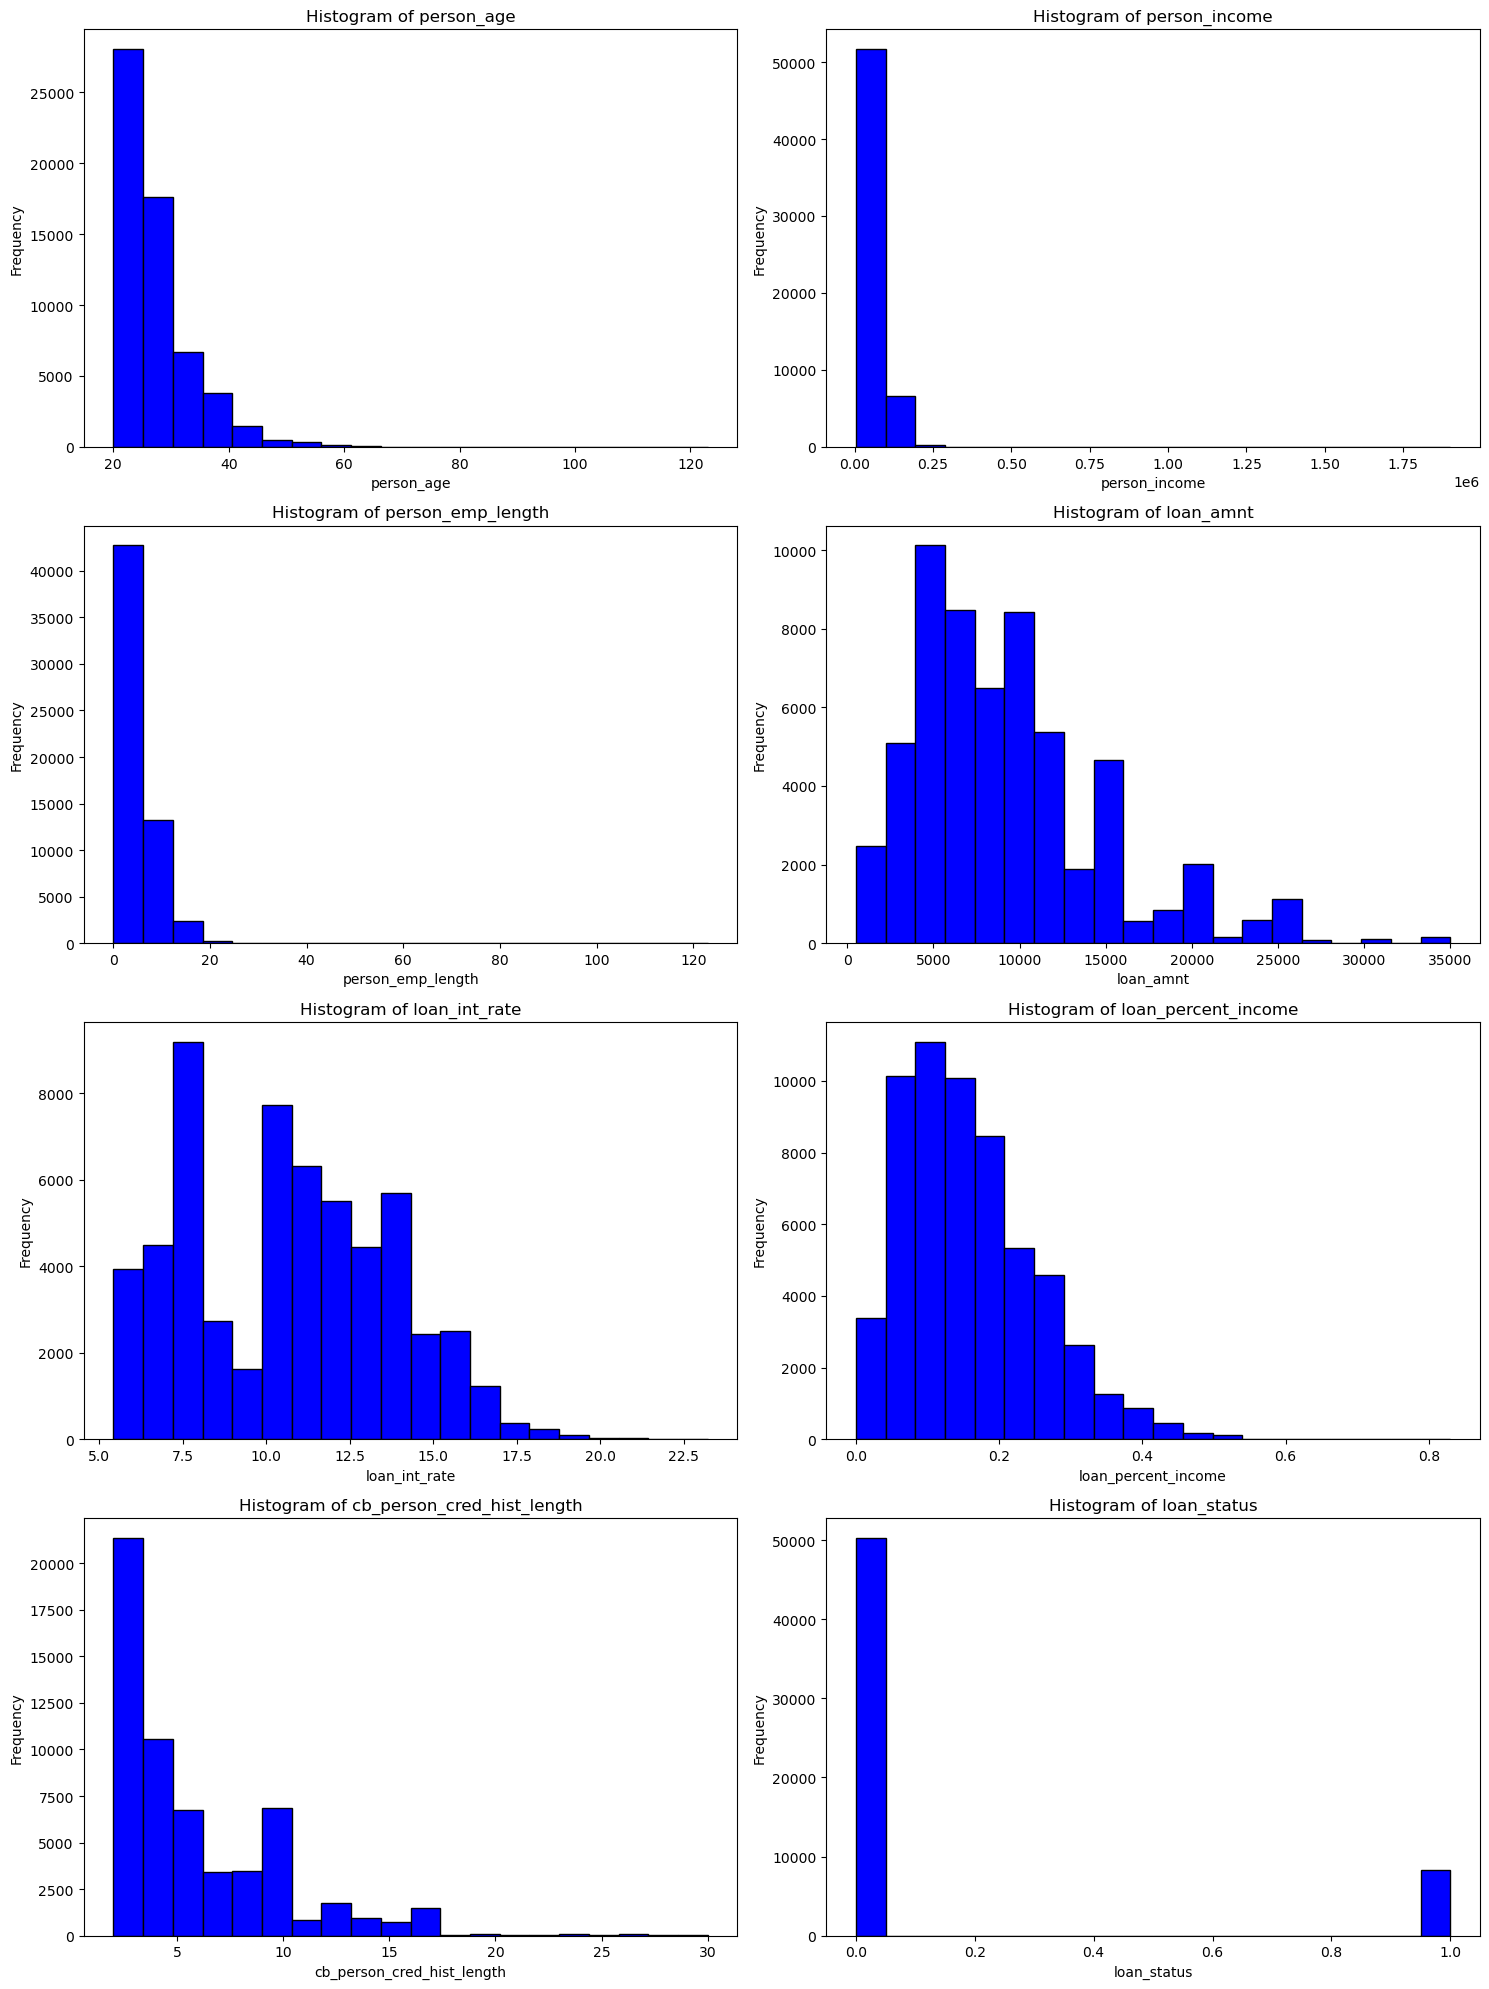

In [29]:
# Selecting numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for all numerical columns
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns):
    ax = axes[i // 2, i % 2]
    ax.hist(train_data[column], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()

- Data Imbalance: The loan_status target variable is heavily imbalanced. We may need to address this by using resampling techniques or focusing on appropriate metrics (e.g., precision, recall, F1 score).
- Outliers: Features like person_income, person_age, and person_emp_length may have outliers. We should consider handling these outliers—either by capping values or analyzing them further.
- Feature Engineering: Some features, like id, may not provide useful information for our model and should be dropped. Other features could be transformed to normalize their distributions, such as using log transformations on highly skewed data (person_income, loan_amnt).

C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brett Lill\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

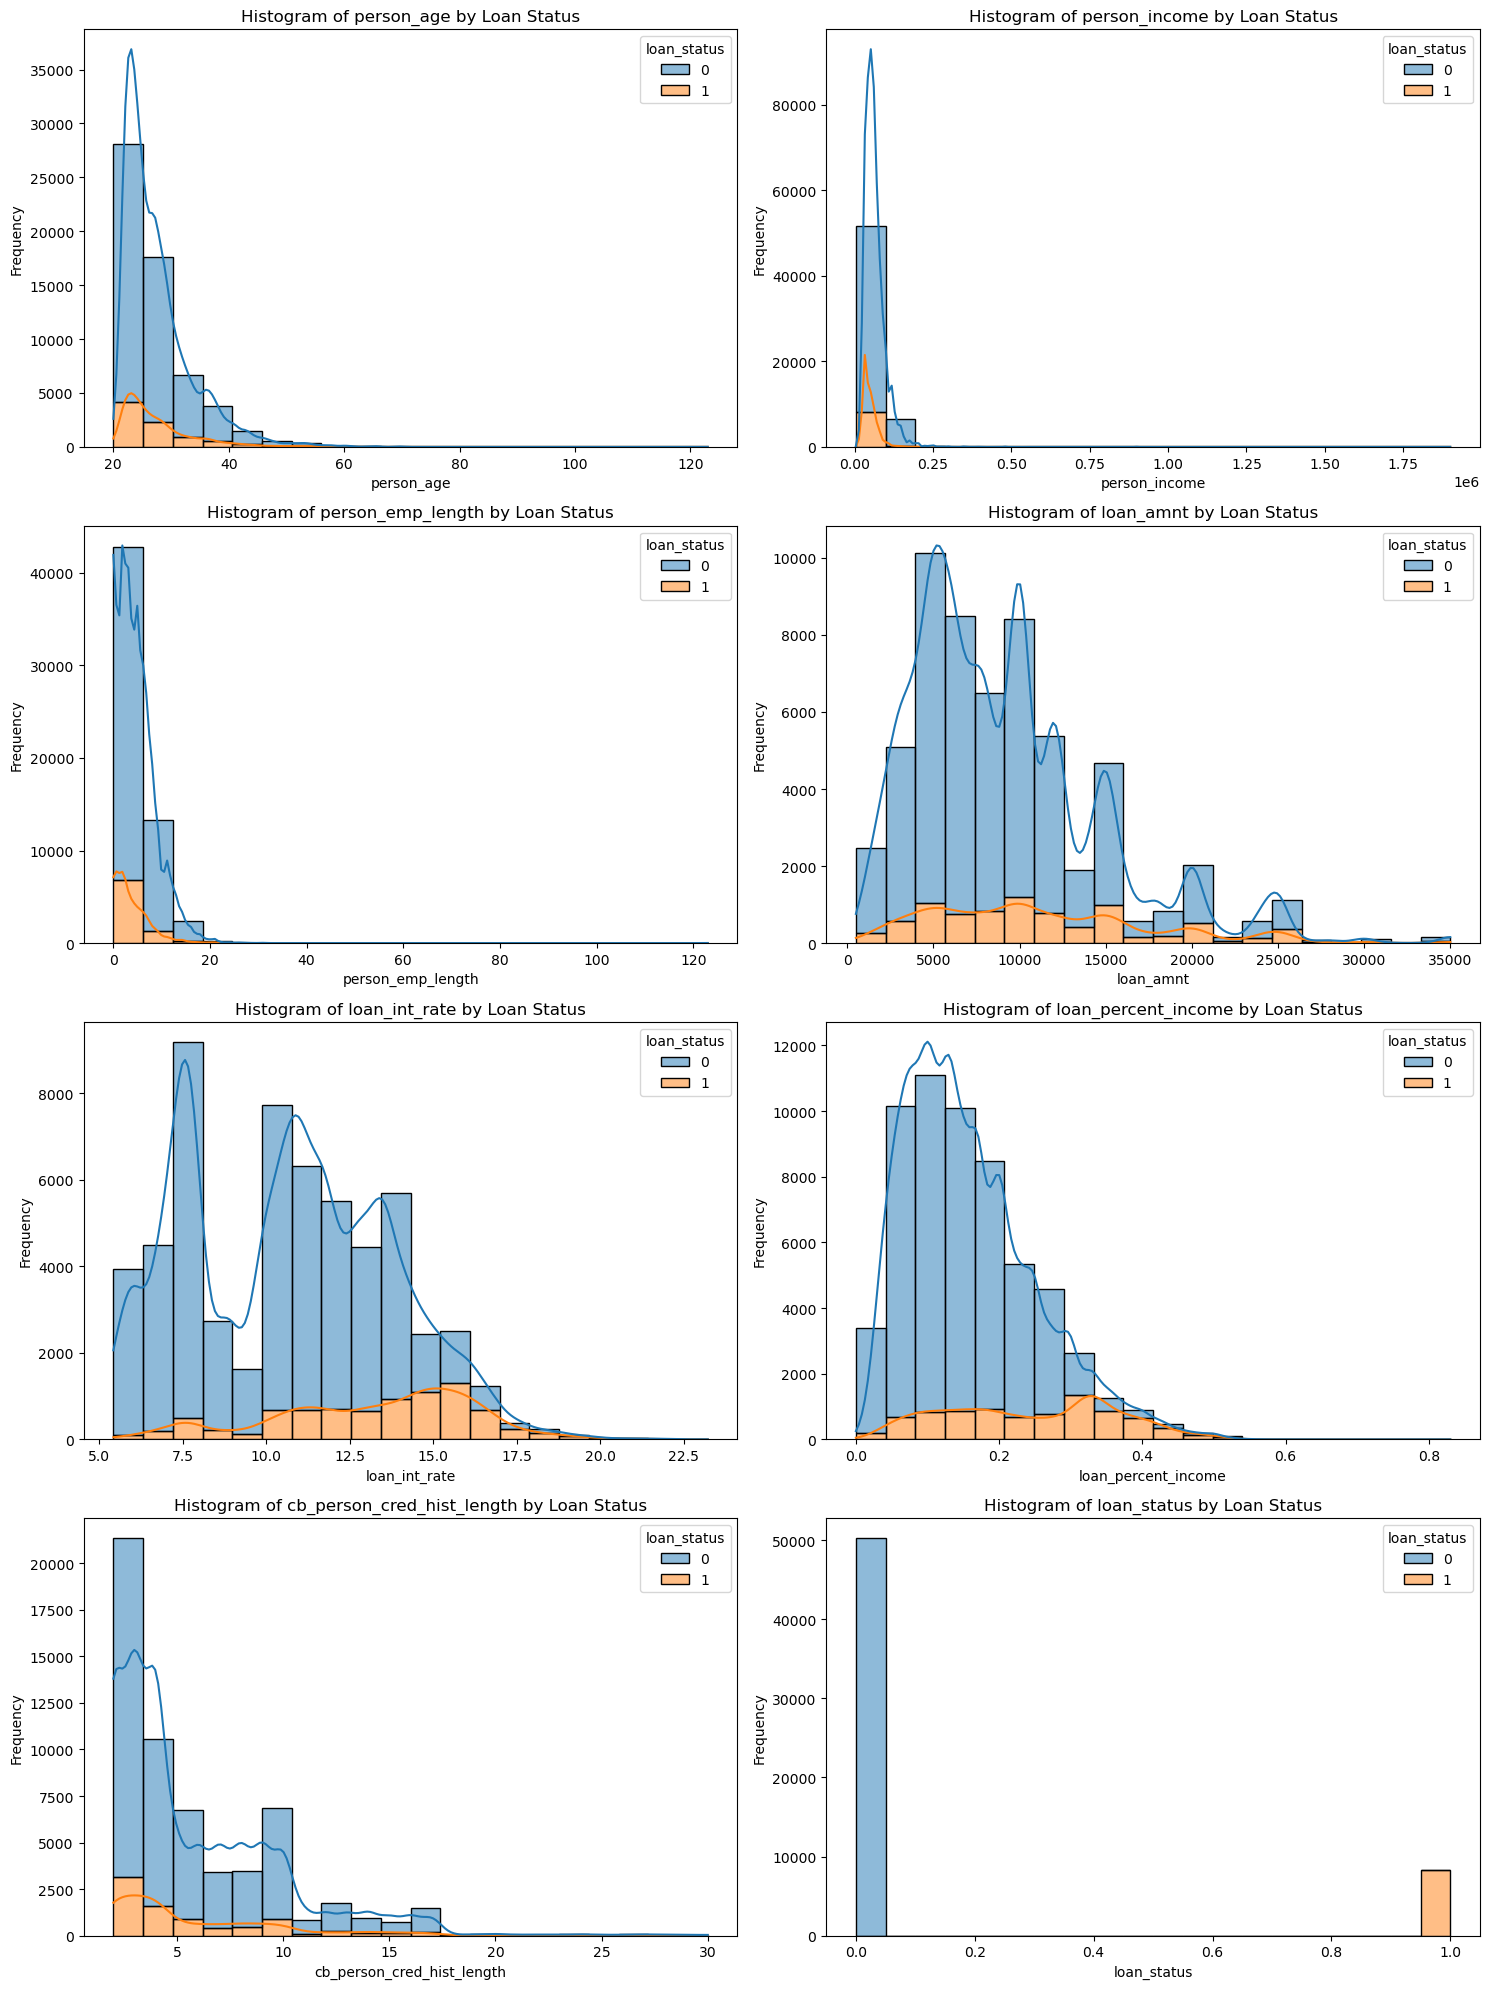

In [31]:
# Plotting histograms for numerical columns parsed by loan_status using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=train_data, x=column, hue='loan_status', multiple='stack', ax=ax, bins=20, edgecolor='black', kde=True)
    ax.set_title(f'Histogram of {column} by Loan Status')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Analysis of Numerical Feature Histograms by Loan Status

1. **person_age**:
   - **Distribution**: The majority of loan applicants are young, between the ages of 20 and 40.
   - **Loan Status Comparison**: The default (`loan_status = 1`) distribution is more concentrated in the lower age ranges. As age increases, the frequency of defaults decreases, indicating younger applicants are more prone to default.

2. **person_income**:
   - **Distribution**: Income is heavily skewed towards the lower end, with most applicants having an income below $250,000.
   - **Loan Status Comparison**: Those with lower income are more likely to default. Applicants with higher income have lower default rates, suggesting a correlation between higher income and financial stability.

3. **person_emp_length**:
   - **Distribution**: Most applicants have a short employment length, under 20 years.
   - **Loan Status Comparison**: Applicants with longer employment lengths have fewer defaults. Those with shorter employment lengths tend to have a higher rate of default, which aligns with the notion that job stability impacts financial reliability.

4. **loan_amnt**:
   - **Distribution**: Loan amounts are normally distributed, with a concentration around $5,000 to $15,000.
   - **Loan Status Comparison**: Defaults are more prevalent in smaller loan amounts, although there is some representation of defaults across all loan amounts. This could indicate that while smaller loans are more common, there is still risk associated across different loan sizes.

5. **loan_int_rate**:
   - **Distribution**: The interest rate ranges from 5% to over 20%, with a concentration around 10-15%.
   - **Loan Status Comparison**: Higher interest rates have a greater number of defaults, suggesting that higher rates might correlate with higher risk profiles for borrowers.

6. **loan_percent_income**:
   - **Distribution**: Most applicants allocate a small percentage of their income towards loans, primarily below 0.4.
   - **Loan Status Comparison**: Higher percentages of income allocated towards loan repayments tend to have more defaults. This is consistent with higher financial stress on applicants, making them more prone to default.

7. **cb_person_cred_hist_length**:
   - **Distribution**: The credit history length is mostly below 15 years.
   - **Loan Status Comparison**: Shorter credit histories have a higher rate of defaults. Longer credit histories tend to be associated with fewer defaults, likely indicating more established credit behavior and reliability.

8. **loan_status** (Target Variable):
   - This plot mainly indicates the heavy imbalance in the target variable, with far more non-defaults (`loan_status = 0`) than defaults (`loan_status = 1`). This imbalance will need to be addressed in the modeling phase to ensure the classifier's performance is not biased towards predicting non-defaults.

### Key Takeaways and Recommendations:

1. **Feature Relationships**:
   - Features like **person_age**, **person_income**, **person_emp_length**, **loan_int_rate**, and **cb_person_cred_hist_length** appear to have significant differences in their distributions when grouped by loan status. These features may serve as strong predictors in the model.
   - **loan_percent_income** and **loan_amnt** also show variation in default behavior, indicating potential predictive power.

2. **Data Imbalance**:
   - The **loan_status** variable is heavily imbalanced. Consider using techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) or **undersampling** to address this imbalance during model training.

3. **Next Steps**:
   - Proceed with handling the class imbalance and conduct feature engineering.
   - Consider transforming skewed features (e.g., `person_income`, `loan_percent_income`) to normalize their distributions for better model performance.

Let me know if you would like to proceed with these next steps or explore another part of the analysis!



## Categorical columns

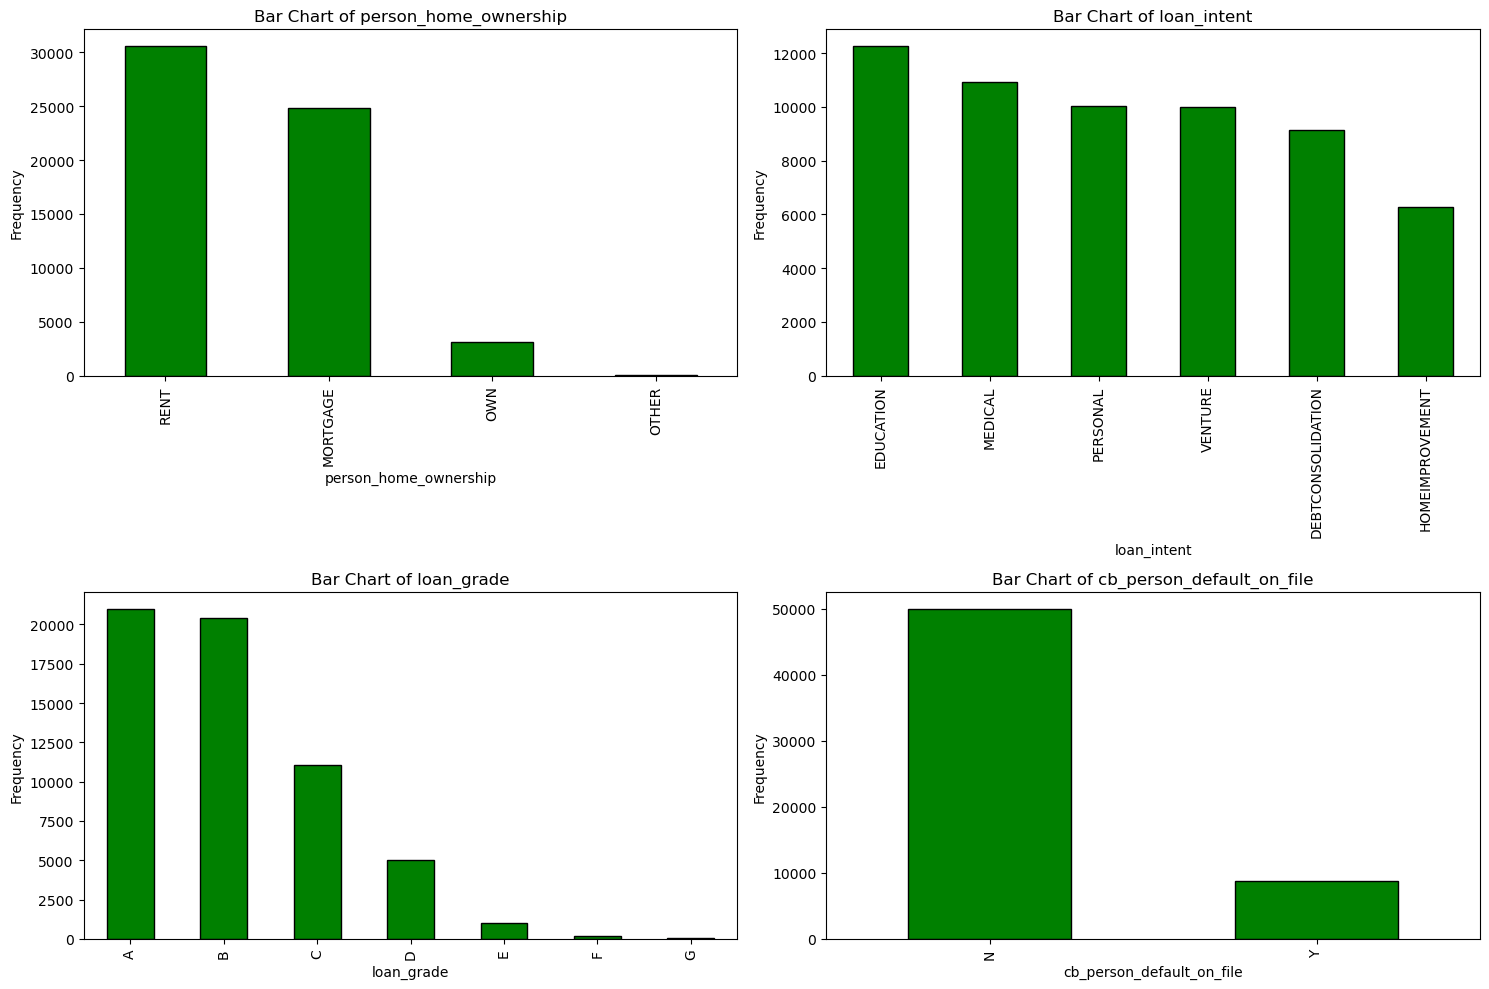

In [22]:
# Selecting categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Plotting bar charts for all categorical columns
num_cats = len(categorical_columns)
num_rows = (num_cats + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

for i, column in enumerate(categorical_columns):
    ax = axes[i // 2, i % 2]
    train_data[column].value_counts().plot(kind='bar', ax=ax, color='green', edgecolor='black')
    ax.set_title(f'Bar Chart of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_cats, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()

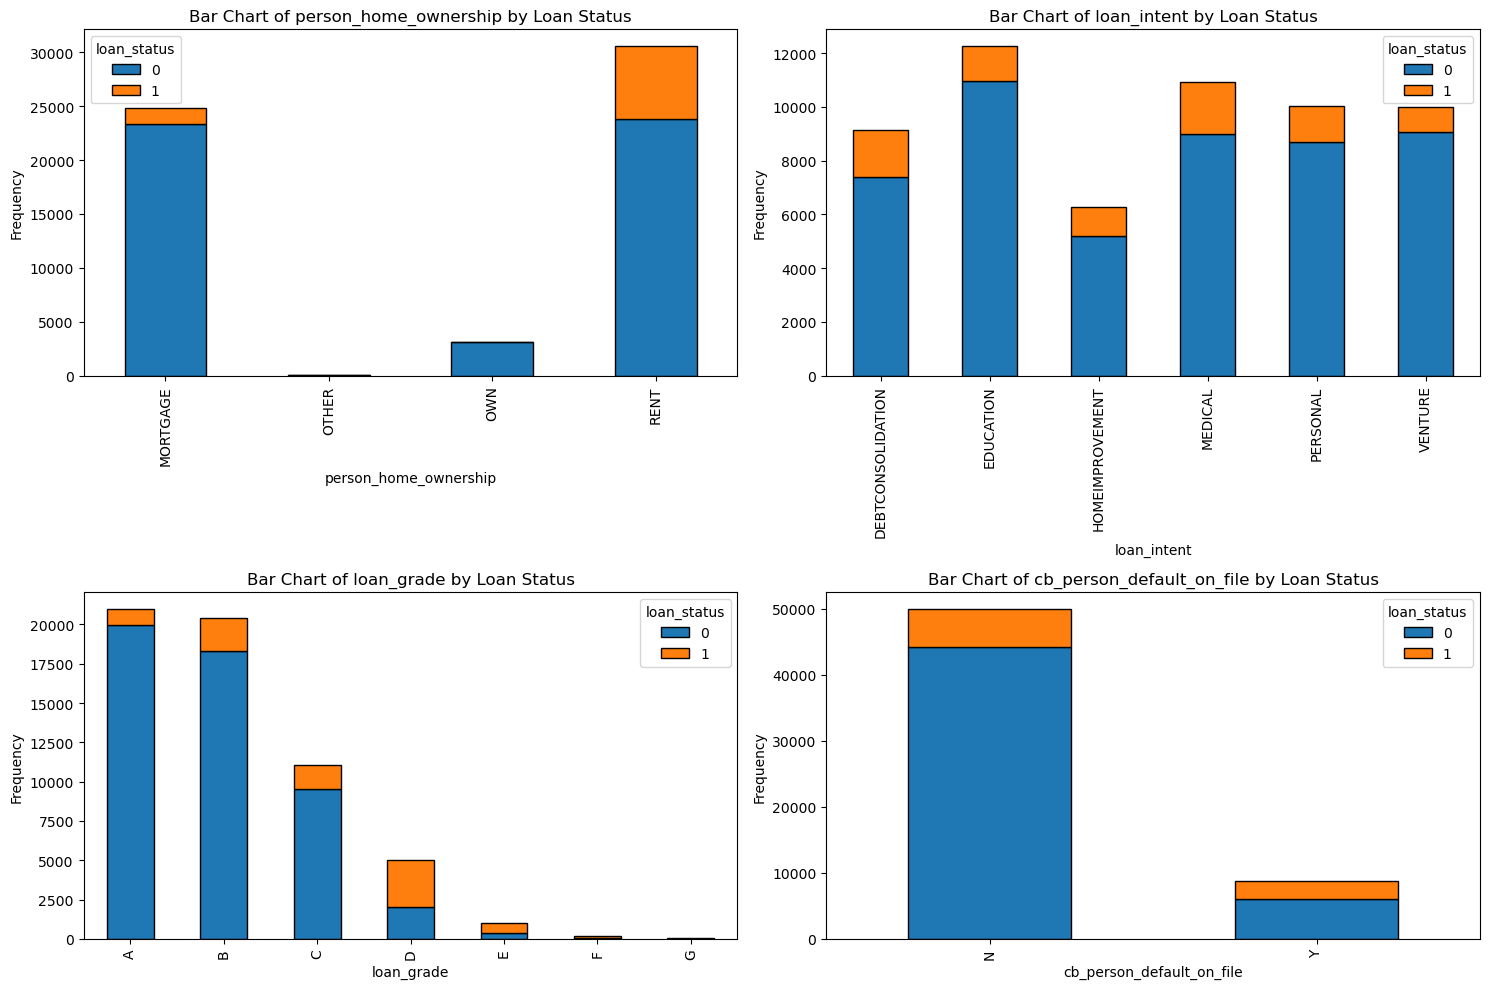

In [23]:
# Selecting categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Plotting bar charts for all categorical columns parsed by loan_status
num_cats = len(categorical_columns)
num_rows = (num_cats + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

for i, column in enumerate(categorical_columns):
    ax = axes[i // 2, i % 2]
    train_data.groupby([column, 'loan_status']).size().unstack().plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title(f'Bar Chart of {column} by Loan Status')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_cats, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()

## Correlation analysis

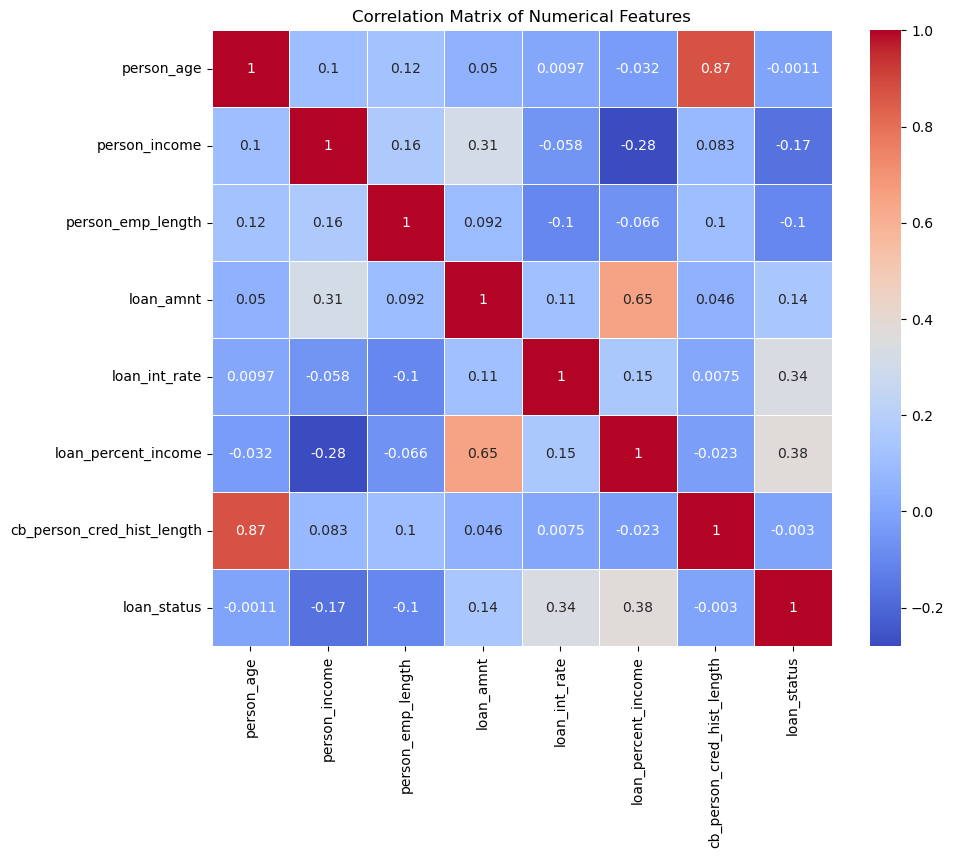

In [33]:
# Selecting numerical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical features
correlation_matrix = train_data[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Variance Inflation Factor (VIF)

In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'train_data' is the dataset, and we want to calculate VIF for numerical features
# Select numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['loan_status'])  # Exclude target variable if present

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_features.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

# Print the VIF values
print(vif_data)

                      Feature        VIF
0                  person_age  33.891238
1               person_income   7.120719
2           person_emp_length   2.523039
3                   loan_amnt  11.565931
4               loan_int_rate  11.602854
5         loan_percent_income  11.569184
6  cb_person_cred_hist_length   7.948236


### VIF Analysis of Numerical Features

Based on the **Variance Inflation Factor (VIF)** output for the numerical features, let's evaluate the potential multicollinearity among these features:

#### **General Guideline**:
- **VIF < 5**: Features have low multicollinearity.
- **VIF between 5 and 10**: Features may have moderate multicollinearity.
- **VIF > 10**: Features have high multicollinearity, which may be problematic.

#### **Feature VIF Values**:
1. **person_age (VIF = 33.89)**:
   - This feature has a **high VIF** value, indicating **significant multicollinearity**. It suggests that `person_age` shares a lot of information with one or more other features in the dataset.
  
2. **person_income (VIF = 7.12)**:
   - This feature has a **moderate VIF** value, suggesting that it has some multicollinearity but is not extremely high.

3. **person_emp_length (VIF = 2.52)**:
   - The VIF for this feature is **low**, indicating it does not suffer much from multicollinearity.

4. **loan_amnt (VIF = 11.57)**:
   - This feature has a **high VIF** value, suggesting significant multicollinearity with other features.

5. **loan_int_rate (VIF = 11.60)**:
   - `loan_int_rate` also has a **high VIF**, indicating it is strongly correlated with other features.

6. **loan_percent_income (VIF = 11.57)**:
   - This feature has a **high VIF** value, which means it also suffers from multicollinearity.

7. **cb_person_cred_hist_length (VIF = 7.95)**:
   - This feature has a **moderate to high VIF**, indicating some level of multicollinearity.

### **Key Insights and Recommendations**:

- **Features with High VIF (> 10)**:
  - **`person_age`**, **`loan_amnt`**, **`loan_int_rate`**, and **`loan_percent_income`** have **high VIF** values, suggesting significant multicollinearity.
  - This can be problematic for some models, particularly linear models, as it leads to instability and unreliable coefficient estimates.
  
- **Possible Actions**:
  1. **Remove or Combine Features**:
     - Consider **removing** features with high VIF values, especially if they add redundant information to the model.
     - Since **`person_age`** and **`cb_person_cred_hist_length`** may be highly correlated (as also indicated by the correlation matrix), removing one of them could help reduce redundancy.
  
  2. **Feature Engineering**:
     - Instead of dropping features outright, you could also **combine** some of the correlated features. For instance, if `loan_amnt` and `loan_percent_income` are correlated, you could create a new ratio feature that captures this relationship.
  
  3. **Principal Component Analysis (PCA)**:
     - Consider using **PCA** to transform the data into uncorrelated components. This can help address multicollinearity while retaining most of the variance in the data.

- **Keep Features with Low or Moderate VIF**:
  - **`person_emp_length`** has a **low VIF**, which means it should be retained, as it doesn't contribute significantly to multicollinearity.
  - **`person_income`** and **`cb_person_cred_hist_length`** have **moderate VIF** values, so it may be beneficial to keep them unless further simplification is needed.

### Summary:
- **High VIF** values for `person_age`, `loan_amnt`, `loan_int_rate`, and `loan_percent_income` indicate high multicollinearity, which should be addressed.
- You could **remove**, **combine**, or apply **dimensionality reduction** on these features to reduce redundancy and improve model stability.

Let me know if you need assistance in applying any of these techniques or would like more detailed guidance on the next steps!



## Tree-based feature importance

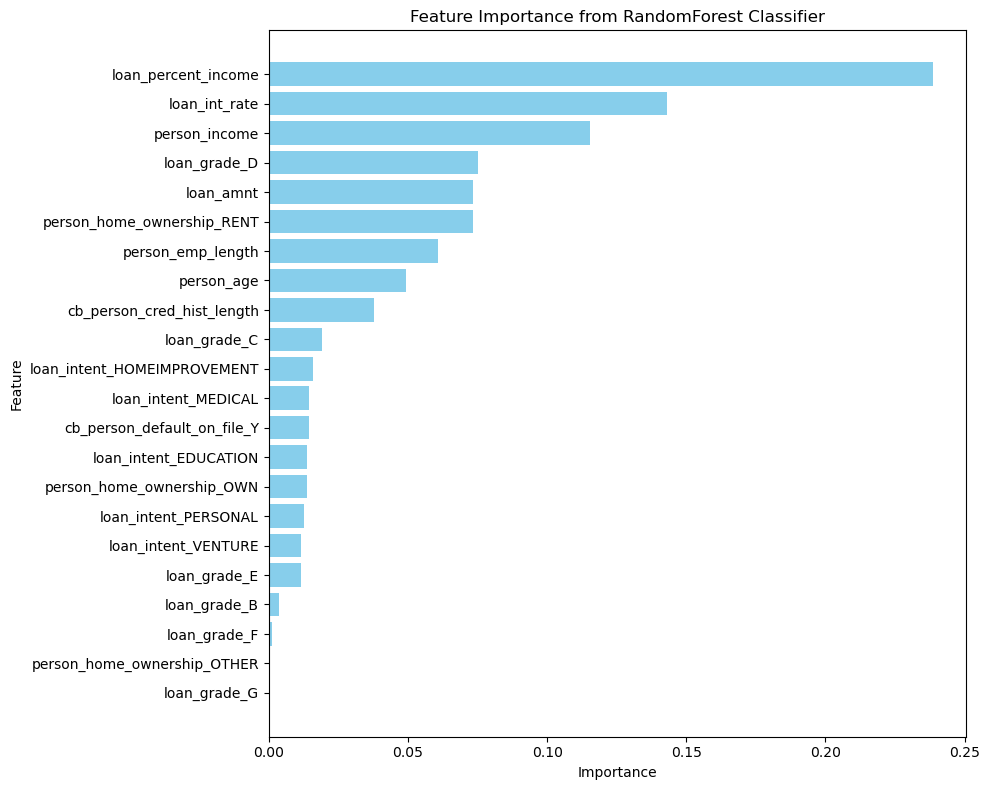

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'loan_status' is the target variable
X = train_data.drop(columns=['loan_status'])
y = train_data['loan_status']

# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Train a RandomForestClassifier to determine feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Feature Importance Analysis from RandomForest Classifier

The feature importance plot generated by the RandomForest classifier highlights the relative importance of each feature in predicting the target variable (`loan_status`). Below are key observations from the chart:

1. **Top Important Features**:
   - **`loan_percent_income`** is by far the most important feature. This suggests that the proportion of income allocated to loan repayment is a significant predictor of loan default. High loan percentages relative to income likely indicate increased financial stress.
   - **`loan_int_rate`** is the second most important feature. This indicates that the interest rate on a loan plays a key role in determining whether an applicant will default. Higher interest rates may be associated with riskier applicants.
   - **`person_income`** is also highly important. Higher income tends to lower the risk of default, as more financial resources are available to cover repayments.

2. **Moderately Important Features**:
   - **`loan_grade_D`**, **`loan_amnt`**, and **`person_home_ownership_RENT`** are moderately important. Applicants with lower loan grades (e.g., `D`) are likely higher-risk borrowers. Similarly, applicants who rent their homes might be considered higher risk compared to those who own.
   - **`person_emp_length`** and **`person_age`** also show moderate importance. Longer employment length and older age may indicate greater stability, contributing to reduced default risk.

3. **Least Important Features**:
   - Features such as **`loan_intent`** categories (`HOMEIMPROVEMENT`, `MEDICAL`, `EDUCATION`, `PERSONAL`, etc.) and lower loan grades (`E`, `F`, `G`) have low importance. This suggests that the specific intent of the loan or some lower loan grades may not contribute significantly to predicting default.
   - **`cb_person_cred_hist_length`** and **`cb_person_default_on_file_Y`** also have low to moderate importance, implying that credit history length and past defaults are not as influential compared to other factors.

### Key Insights:
- **Income-Related Features Dominate**: Features that relate to an applicant's financial capacity, such as **`loan_percent_income`**, **`person_income`**, and **`loan_amnt`**, are crucial predictors of default risk. This aligns with the intuition that a borrower's financial situation heavily influences their ability to repay loans.
- **Interest Rate and Loan Grade Are Crucial**: The importance of **`loan_int_rate`** and **loan grades** (`D`, `C`, etc.) suggests that loan characteristics, including perceived risk, are important in predicting whether a borrower will default.
- **Demographic and Employment Factors**: Features such as **`person_age`** and **`person_emp_length`** show moderate importance, indicating that demographics and employment stability also play a role in loan outcomes, though not as strongly as income-related factors.

### Recommendations:
- **Focus on Top Predictors**: Emphasize features such as **`loan_percent_income`**, **`loan_int_rate`**, and **`person_income`** when developing or refining predictive models. These features provide the most information for distinguishing between defaulters and non-defaulters.
- **Consider Reducing Less Important Features**: To simplify the model, consider dropping or reducing the impact of features like **`loan_intent`** categories or less important loan grades. This could improve model interpretability and efficiency without sacrificing much predictive power.

Let me know if you'd like to proceed with further steps, such as refining the model or applying feature selection techniques!



## t-SNE Visualization

In [ ]:
# Apply t-SNE to visualize loan candidates that did and did not default
print("\nApplying t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(train_data)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(X_embedded, columns=['Component 1', 'Component 2'])
tsne_df['loan_status'] = y_train.values

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='loan_status', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Loan Candidates (Did and Did Not Default)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Loan Status', loc='best')
plt.show()